<a href="https://colab.research.google.com/github/rajshekharsingh66/Capstone_project1/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
csv_file_path = '/content/Global Terrorism Data.csv'

encodings_to_try = ['utf-8', 'ISO-8859-1', 'latin1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv(csv_file_path, encoding=encoding)
        break  # If successful, exit the loop
    except UnicodeDecodeError:
        continue  # If decoding fails, try the next encoding


In [46]:
df.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0.0
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0


In [47]:
df.tail()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualty
115313,2013,3,20,Turkey,Middle East & North Africa,Istanbul,41.106178,28.689863,Bombing/Explosion,0.0,0.0,Kartal Municipality Library,03/20/2013: An explosive device was discovered...,Unknown,Private Citizens & Property,Explosives,NaN,0.0
115314,2013,3,20,India,South Asia,Mumbai,18.942747,72.827252,Unarmed Assault,0.0,1.0,Joint Director: Dr. Rajkumar Patil,03/20/2013: Assailants attacked Dr. Rajkumar P...,Unknown,Private Citizens & Property,Melee,NaN,1.0
115315,2013,3,20,Syria,Middle East & North Africa,Damascus,33.515244,36.292084,Bombing/Explosion,0.0,3.0,Base,03/20/2013: A fuel truck rigged with explosive...,Free Syrian Army,Government (Diplomatic),Explosives,"Abu al-Noor, spokesperson for the Ahfad Al Ras...",3.0
115316,2013,3,20,Afghanistan,South Asia,Unknown,33.495598,67.768307,Bombing/Explosion,1.0,0.0,Vehicle,03/20/2013: A North Atlantic Treaty Organizati...,Taliban,Military,Explosives,NaN,1.0
115317,2013,3,18,Pakistan,South Asia,Shabqadar,34.217285,71.561043,Bombing/Explosion,0.0,0.0,NaN,03/18/2013: An explosive device detonated outs...,NaN,Government (General),NaN,NaN,0.0


In [48]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary',
       'Group', 'Target_type', 'Weapon_type', 'Motive', 'Casualty'],
      dtype='object')

In [49]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualty
count,115318.000000,115318.000000,115318.000000,111169.000000,1.111680e+05,115318.000000,115318.000000,115318.000000
mean,1995.537895,6.406996,15.318788,21.817235,-7.613598e+02,2.154989,2.967542,5.122531
std,11.746390,3.410568,8.809549,20.941383,2.584916e+05,10.761049,42.106881,48.879371
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1986.000000,3.000000,8.000000,7.879961,-6.810434e+01,0.000000,0.000000,0.000000
50%,1994.000000,6.000000,15.000000,29.025833,3.117943e+01,0.000000,0.000000,1.000000
75%,2008.000000,9.000000,23.000000,35.724533,6.714331e+01,1.000000,1.000000,3.000000
max,2013.000000,12.000000,31.000000,74.633553,1.793667e+02,1384.000000,8191.000000,9574.000000


In [50]:
df.dtypes

Year             int64
Month            int64
Day              int64
Country         object
Region          object
city            object
latitude       float64
longitude      float64
AttackType      object
Killed         float64
Wounded        float64
Target          object
Summary         object
Group           object
Target_type     object
Weapon_type     object
Motive          object
Casualty       float64
dtype: object

In [51]:
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 115318
Number of columns: 18


In [52]:
df.index

RangeIndex(start=0, stop=115318, step=1)

In [53]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
city             434
latitude        4149
longitude       4150
AttackType         0
Killed             0
Wounded            0
Target           637
Summary        66129
Group              1
Target_type        0
Weapon_type        1
Motive         74794
Casualty           0
dtype: int64

In [54]:
df.nunique()

Year              43
Month             13
Day               32
Country          205
Region            12
city           22752
latitude       23067
longitude      22962
AttackType         9
Killed           172
Wounded          220
Target         69100
Summary        48643
Group           3025
Target_type       22
Weapon_type       12
Motive          7564
Casualty         311
dtype: int64

In [55]:
# renaming the columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType',
               'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

# concatinating the columns killed and wounded
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]
df.head(5)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0.0
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0





#1.Which region has highest terrorirst attacks?




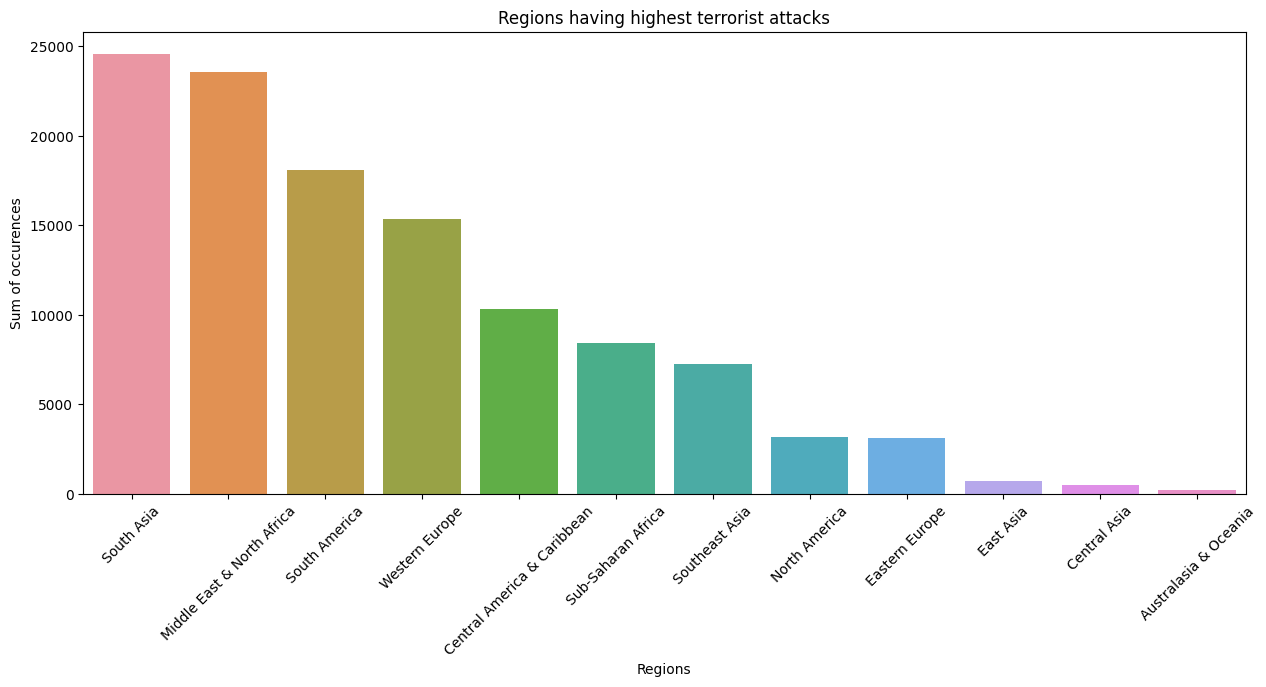

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size (width, height) in inches
plt.figure(figsize=(15, 6))  # Adjust the width and height as needed

# Assuming 'df' is your DataFrame with a 'Region' column
sns.countplot(x='Region', data=df,order=df['Region'].value_counts().index)

# Add labels and a title
plt.xlabel('Regions')
plt.ylabel('Sum of occurences')
plt.title('Regions having highest terrorist attacks')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

#2.Which country has highest terrorirst attacks?

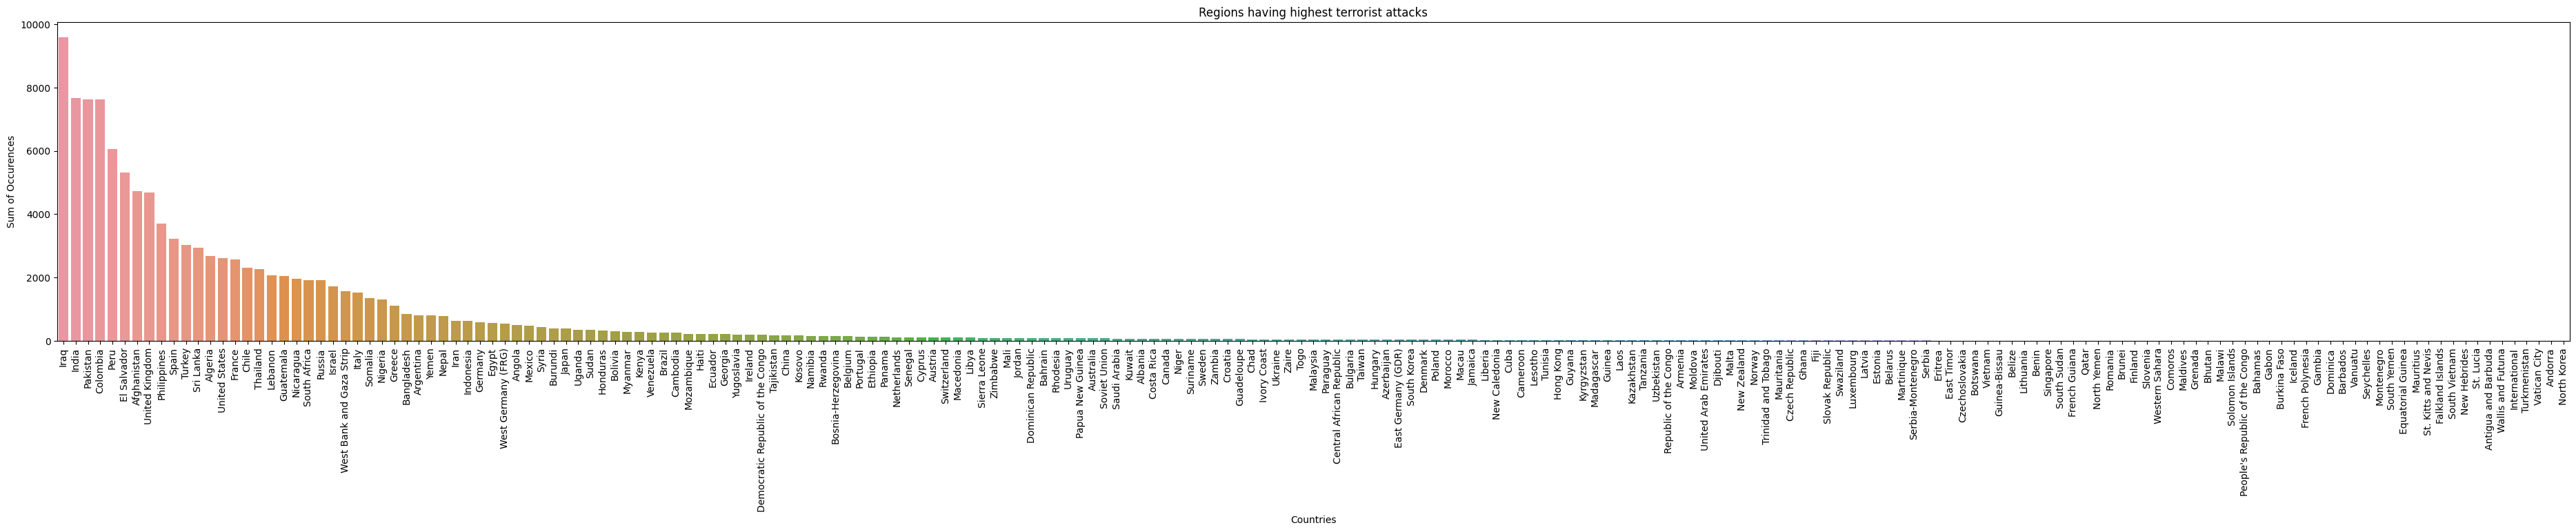

In [58]:
plt.figure(figsize=(47,6))
sns.countplot(x='Country', data=df , order=df['Country'].value_counts().index)

# Add labels and a title
plt.xlabel('Countries')
plt.ylabel('Sum of Occurences')
plt.title('Regions having highest terrorist attacks')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

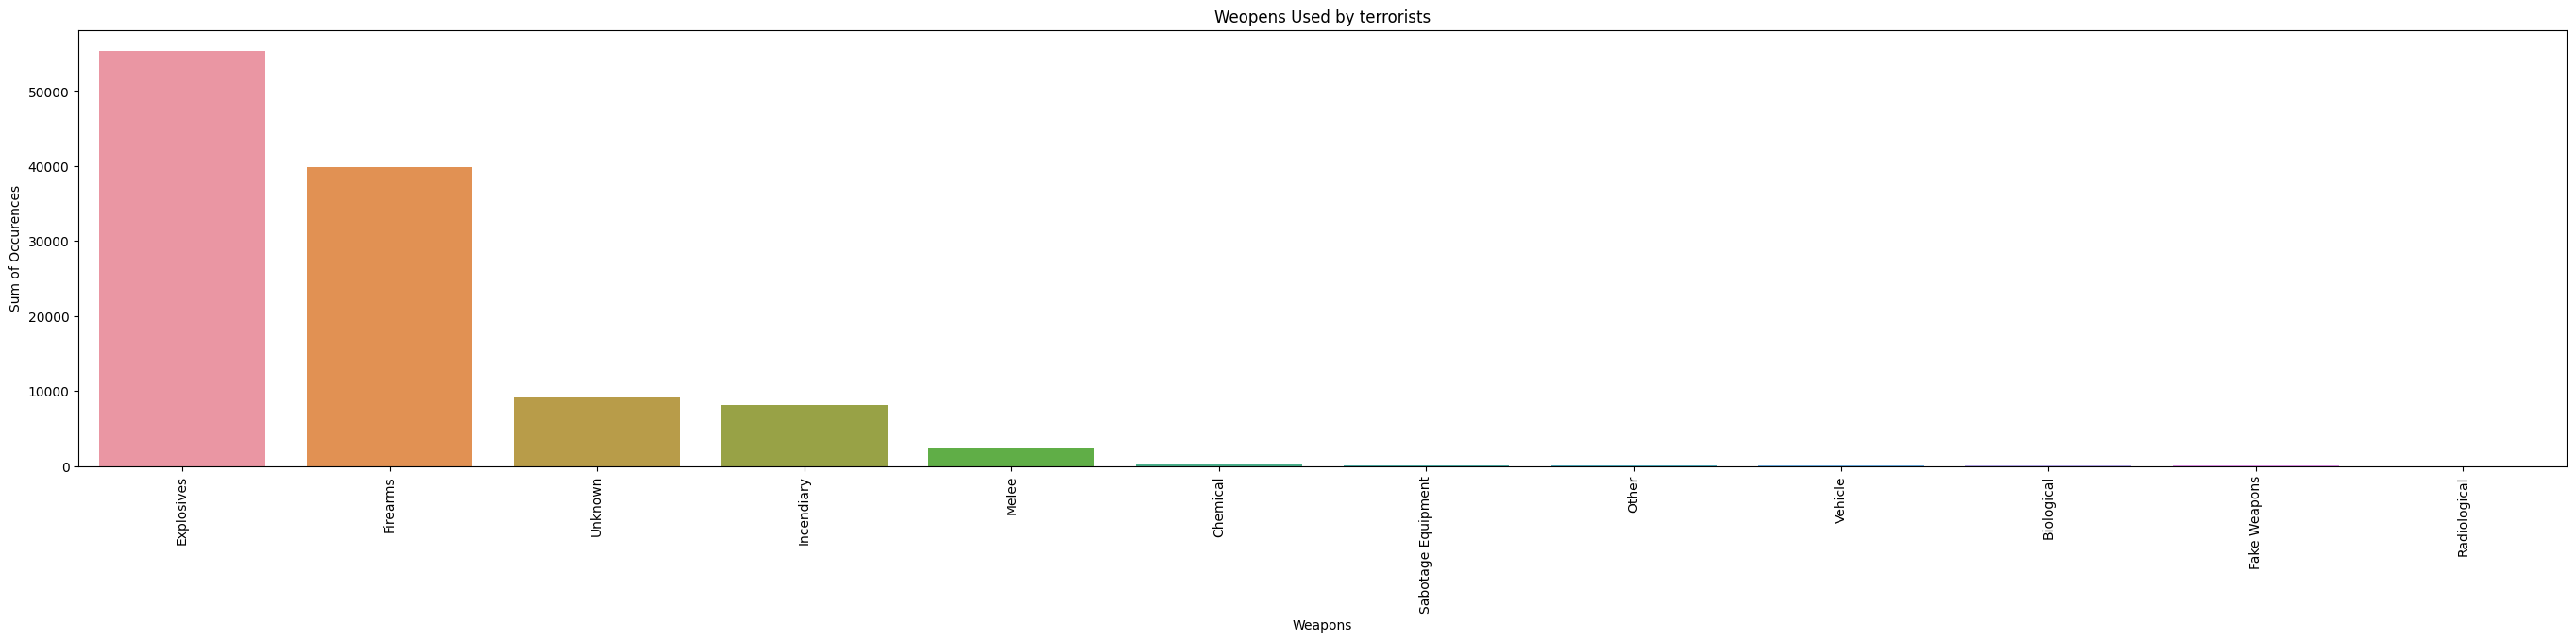

In [44]:
plt.figure(figsize=(34,6))
df['Weapon_type'] = df['Weapon_type'].replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')
sns.countplot(x='Weapon_type',data=df,order=df['Weapon_type'].value_counts().index)
plt.xlabel('Weapons')
plt.ylabel('Sum of Occurences')
plt.title('Weopens Used by terrorists')
plt.xticks(rotation=90)
plt.show()

#4. Motive behind activities related to terrorism

In [59]:
df1 = df[df['Motive'].notna()]

In [60]:
df1

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualty
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,0.0
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,0.0
11,1970,1,6,United States,North America,Denver,39.758968,-104.876305,Facility/Infrastructure Attack,0.0,0.0,"Army Recruiting Station, Denver Colorado",1/6/1970: Unknown perpetrators threw a Molotov...,Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War,0.0
14,1970,1,9,United States,North America,Rio Piedras,18.386932,-66.061127,Facility/Infrastructure Attack,0.0,0.0,Baker's Store,1/9/1970: The Armed Commandos of Liberation c...,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115264,2013,3,19,Turkey,Middle East & North Africa,Ankara,39.930771,32.767540,Bombing/Explosion,0.0,1.0,Parking Lot,03/19/2013: Two hand grenades detonated in the...,Devrimici Halk Kurtulus Cephesi (DHKP/C),Government (General),Explosives,Devrimici Halk Kurtulus Cephesi (DHKP/C) claim...,1.0
115290,2013,3,19,Philippines,Southeast Asia,Mawab,7.500000,125.933333,Armed Assault,0.0,0.0,Convoy,03/19/2013: Assailants opened fire on a police...,New People's Army (NPA),Police,Firearms,"The specific motive is unknown; however, Senio...",0.0
115298,2013,3,18,Philippines,Southeast Asia,Nabangig,12.102778,123.941389,Armed Assault,1.0,0.0,Councilor: Ervin Niez,03/18/2013: Assailants opened fire on Ervin Ni...,Unknown,Government (General),Firearms,"The specific motive is unknown; however, Senio...",1.0
115303,2013,3,19,India,South Asia,Sopore,34.288891,74.463715,Armed Assault,1.0,0.0,Youth: Suhail Ahmed Sofi,03/19/2013: Assailants opened fire on a civili...,Lashkar-e-Taiba (LeT),Private Citizens & Property,Firearms,"The specific motive is unknown; however, sourc...",1.0
